# Path Planning with Quintic Functions in Frenét Coordinate System

This is an introduction on how to compute a driving path for an autonomous vehicle. In this article, I focus only the trajectory creation. Obstacle perception and avoidance shall be out of scope.

The idea comes from paper 

> Werling, M., Ziegler, J., Kammel, S., & Thrun, S. Optimal Trajectory Generation for Dynamic Street Scenarios in a Frenét Frame. 

I would like to show in detail how this is put into practice. I will omit all references to this paper in this article, as all ideas coming from there or the referenced documents.

Maneuvers of a car shall be as smooth as possible. Hard turns or hard deceleration are only required in dangerous situations. Thus, we need a function that minimizes   Jerk, which is used in physics to describe how much the acceleration changes.

## Frenét Frame

Assume that a car is lateral misplaced from the desired lane and should return to the optimal position while making a compromise between comfort and duration of the maneuver. The same compromise has to be found for the speed of the car. It shall not drive too close to or too far from the vehicle in the front. Two cost function, lateral and longitudinal, can be utilized to minimize jerk. 


![Fig. 2 in Paper: Optimal Trajectory Generation for Dynamic Street Scenarios in a Frenét Frame.](https://raw.githubusercontent.com/mayio/pathplanning/master/_notebooks/PathPlanningImages/FrenetFig2.png)
*Fig. 2 in Paper: Optimal Trajectory Generation for Dynamic Street Scenarios in a Frenét Frame.*

By switching from Cartesian to the Frenét reference frame it is possible to formulate a one dimensional trajectory with the root point $\vec{r}$ along the center line, the perpendicular offset $d$ and the covered arc length $s$. Jerk can be now defined as the derivatives $\dddot{d}$ and $\dddot{s}$. 

## Quintic Polynomials

It can be shown that quintic (fifth-degree) polynomials are the jerk-optimal connection between a start state $P_0 =
[p_0, \dot{p}_0, \ddot{p}_0]$ (position, velocity, acceleration respectivly) and an end state $P_0 = [p_1, \dot{p}_1, \ddot{p}_1]$ within the time interval $T := t_1 − t_0$ in a one-dimensional problem.

Formulation of a quintic polynomial:
$$
\theta (t) = a_0 + a_1 t + a_2 t^2 + a_3 t^3 + a_4 t^4 \tag{1}
$$

## Cubic Polynomials

Trajectories computed with cubic polynomials cause jumps in accelation. They are not jerk optimal for this reason. But it might be helpful to start an example with a lower degree polynomial. This can then easily extended later on. 

Formulation of a cubic polynomial:
$$
\theta (t) = a_0 + a_1 t + a_2 t^2 + a_3 t^3 \tag{2}
$$

$\theta(t)$ can be seen as a distance or way one has go. The velocity and acceleration are the derivatives.

$$
\dot\theta (t) = a_1 + 2 a_2 t + 3 a_3 t^2 \tag{3}
$$
$$
\ddot\theta (t) = 2 a_2 + 6 a_3 t \tag{4}
$$

## Contraints for Cubic Polynomial Solution

We want that the car returns to its optimal position in a given time interval $T := t_1 − t_0$. The contraint values for pose and kinematic are seen relative. 

$$
\begin{matrix}
t_0 = 0 \\
\theta(t_0) = d && \text{perpendicular offset} \\
\dot\theta(t_0) = \dot{d} && \text{perpendicular velocity} \\
t_1 = \delta t \\
\theta(t_1) = 0 && \text{perpendicular offset} \\
\dot\theta(t_1) = 0 && \text{perpendicular velocity} \\
\end{matrix}
$$

## Find the Coefficents for the Cubic Polynomial Solution

What we want is to find the coefficents $a_0, a_1, a_2, a_3$ for the cubic function using the contraints. We set the contraints into the equations (2), (3) and (4) for $t_0$ and $t_1$

$$
\begin{matrix}
\theta (t_0) = a_0 + a_1 0 + a_2 0 + a_3 0 \\
\theta (t_0) = a_0 
\end{matrix}\tag{5}
$$

We know $\theta (t_0)$ from the contraints. Thus:
$$
a_0 = d
$$

Velocity:
$$
\begin{matrix}
\dot\theta (t_0) = a_1 + 2 a_2 0 + 3 a_3 0 \\
\dot\theta (t_0) = a_1 
\end{matrix}\tag{6}
$$
We know also $\dot\theta (t_0)$ from the contraints. Thus:
$$
a_1 = \dot{d}
$$

We may look now for the coefficients for time $t_1$ and insert the previously found coefficients.
$$
\begin{matrix}
\theta (t_1) = a_0 + a_1 \delta t + a_2 \delta t^2 + a_3 \delta t^3 \\
\theta (t_1) = d + \dot{d} \delta t + a_2 \delta t^2 + a_3 \delta t^3 \\
0 = d + \dot{d} \delta t + a_2 \delta t^2 + a_3 \delta t^3 
\end{matrix}\tag{7}
$$

Velocity for $t_1$
$$
\begin{matrix}
\dot\theta (t_1) = \dot{d} + 2 a_2 \delta t + 3 a_3 \delta t^2 \\ 
\dot\theta (t_1) = \dot{d} + 2 a_2 \delta t + 3 a_3 \delta t^2 \\
0 = \dot{d} + 2 a_2 \delta t + 3 a_3 \delta t^2 
\end{matrix} \tag{8}
$$

We may solve for $a_2$ and $a_3$ now using linear algebra. The quadratic equations (7) and (8) can be expressed with $0 = A b + C$. Which is useful if you want to use the python solver. 

$$
\begin{bmatrix}
0 \\
0 \\
\end{bmatrix}
=
\begin{bmatrix}
\delta t^2 && \delta t^3 \\
2 \delta t && 3 \delta t^2 \\
\end{bmatrix}
\begin{bmatrix}
a_2 \\
a_3 \\
\end{bmatrix}
+
\begin{bmatrix}
d + \dot{d} \delta t \\
\dot{d} \\
\end{bmatrix}
$$

Lets rearrange and multiply with $A^{-1}$ we get

$$
\begin{matrix}
-C = A b\\
A^{-1} (-C) = A^{-1} A b \\
b = A^{-1} (-C) \\
\end{matrix}
$$
$$
\begin{bmatrix}
a_2 \\
a_3 \\
\end{bmatrix}
=
\begin{bmatrix}
\delta t^2 && \delta t^3 \\
2 \delta t && 3 \delta t^2 \\
\end{bmatrix}^{-1}
\begin{bmatrix}
-d - \dot{d} \delta t \\
-\dot{d} \\
\end{bmatrix}
$$ 


The same can be done now also in longitudinal direction for $s$;

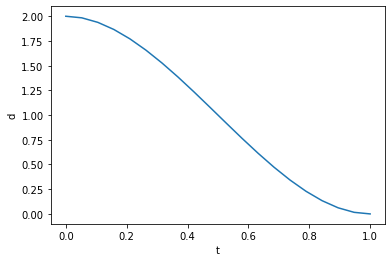

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_polynomial_coefficients(d_0, d_dot_0, delta_t):
  a0 = d_0
  a1 = d_dot_0

  A = np.array([ [delta_t**2,delta_t**3], 
               [2 * delta_t, 3 * delta_t**3]])

  C = np.array([[d_0 + d_dot_0 * delta_t], 
                [d_dot_0]]) * -1                

  b = np.linalg.solve(A,C)

  a2 = b[0]
  a3 = b[1]

  return (a0, a1, a2, a3)

def cubic_polynomial(coefficients, t):
  a0 = coefficients[0]
  a1 = coefficients[1]
  a2 = coefficients[2]
  a3 = coefficients[3]
  theta_pos = a0 + a1 * t + a2 * t**2 + a3 * t**3
  theta_vel = a1 + 2 * a2 * t + 3 * a3 * t**2
  theta_acc = 2 * a2 + 6 * a3 * t
  return (theta_pos, theta_vel, theta_acc)

# setting the contraints
d_0 = 2.
d_dot_0 = 0.
delta_t = 1.

coefficients = cubic_polynomial_coefficients(d_0, d_dot_0, delta_t)

t_sample = np.linspace(0,delta_t, 20)
d = []
d_dot = []
d_dot_dot = []

for t in t_sample:
   (pos,vel,acc) = cubic_polynomial(coefficients, t)
   d.append(pos)
   d_dot.append(vel)
   d_dot_dot.append(acc)

plt.xlabel("t")
plt.ylabel("d")
plt.plot(t_sample, d)
plt.show()

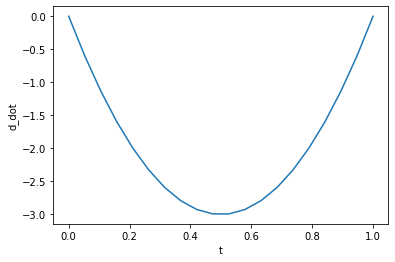

In [28]:
plt.xlabel("t")
plt.ylabel("d_dot")
plt.plot(t_sample, d_dot)
plt.show()

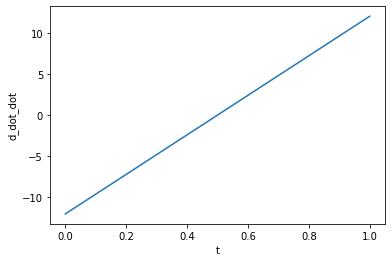

In [30]:
plt.xlabel("t")
plt.ylabel("d_dot_dot")
plt.plot(t_sample, d_dot_dot)
plt.show()

# To be continued